## Leonard Molano  |  Group 6  |  January 29, 2021
### COVID-19 Image Classification

You are provided with a training set and a test set of images of 3 classes. Each image has a filename that is its unique id. The dataset comprises 3 classes: COVID-19, Viral Pneumonia, and Normal. The goal of the project is to create a classifier capable of determining the class of the X-ray image.

In [1]:
import cv2
import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from tensorflow.keras import models, layers
from tensorflow.keras.layers import Conv2D, Flatten, Dense
from tensorflow.keras.optimizers import RMSprop, Adam
from keras.utils.np_utils import to_categorical

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
# Training Images and Lables
x_train = np.load('covid-19-dataset/trainimage.npy')
y_train = pd.read_csv('covid-19-dataset/trainLabels.csv')

# Test Images and Lables
x_test= np.load('covid-19-dataset/testimage.npy')
y_test = pd.read_csv('covid-19-dataset/testLabels.csv')

In [3]:
print(x_train.shape)
print(y_train.shape)
print(" ")
print(x_test.shape)
print(y_test.shape)

(251, 128, 128, 3)
(251, 1)
 
(66, 128, 128, 3)
(66, 1)


Sample images


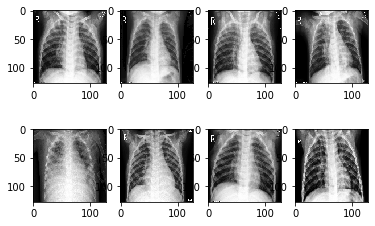

In [4]:
print('Sample images')
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(x_train[i])

# Apply Preprocessing to Images

In [5]:
x_train_pp = []

for img in x_train:
    blurImg = cv2.GaussianBlur(img, (5, 5), 0)   
    x_train_pp.append(blurImg) 
    
x_train_pp = np.asarray(x_train_pp)
x_train_pp = x_train_pp / 255
x_train_pp =  x_train_pp.reshape(x_train_pp.shape[0], 128, 128, 3)
x_train_pp = x_train_pp.astype('float32')

Training images after bluring:


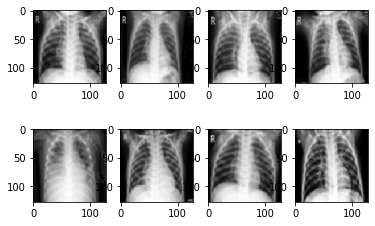

In [6]:
print('Training images after bluring:')
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(x_train_pp[i])

In [7]:
x_test_pp = []

for img2 in x_test:
    blurImg2 = cv2.GaussianBlur(img2, (5, 5), 0)   
    x_test_pp.append(blurImg2) 
    
x_test_pp = np.asarray(x_test_pp)
x_test_pp = x_test_pp / 255
x_test_pp =  x_test_pp.reshape(x_test_pp.shape[0], 128, 128, 3)
x_test_pp = x_test_pp.astype('float32')

Testing images after bluring:


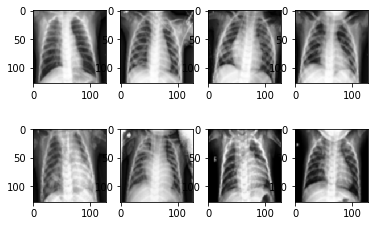

In [8]:
print('Testing images after bluring:')
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(x_test_pp[i])

# One Hot Encode Labels

In [9]:
print(pd.unique(y_train.iloc[:,0]))
print(pd.unique(y_test.iloc[:,0]))

['Viral Pneumonia' 'Covid' 'Normal']
['Viral Pneumonia' 'Covid' 'Normal']


In [10]:
# Normalize label data
enc = LabelBinarizer()
y_train = enc.fit_transform(y_train)
y_test = enc.fit_transform(y_test)

print('Training Labels')
print(np.unique(y_train, axis=0))
print(y_train.shape)
print()
print('Testing Lables')
print(np.unique(y_test, axis=0))
print(y_test.shape)

Training Labels
[[0 0 1]
 [0 1 0]
 [1 0 0]]
(251, 3)

Testing Lables
[[0 0 1]
 [0 1 0]
 [1 0 0]]
(66, 3)


In [11]:
y_train[0]

array([0, 0, 1])

In [12]:
x_train = x_train / 255
x_test = x_test / 255

# CNN Model

In [13]:
batch_size = None

model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), padding='same', activation="relu", input_shape=(128, 128, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (5, 5), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))

model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.GlobalMaxPooling2D())
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        51264     
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0

In [14]:
optimizer = Adam(learning_rate=0.001,
                  beta_1=0.9,
                  beta_2=0.999,
                  epsilon=1e-07,
                  amsgrad=False,
                  name='Adam')

In [15]:
model.compile(optimizer = optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [16]:
history = model.fit(x_train_pp, y_train, epochs = 60, validation_data=(x_test, y_test))

Epoch 1/60
8/8 [==============================] - 5s 663ms/step - loss: 4.0816 - accuracy: 0.3586 - val_loss: 1.1007 - val_accuracy: 0.3182
Epoch 2/60
8/8 [==============================] - 5s 629ms/step - loss: 2.5588 - accuracy: 0.4024 - val_loss: 1.0985 - val_accuracy: 0.2424
Epoch 3/60
8/8 [==============================] - 5s 612ms/step - loss: 1.9739 - accuracy: 0.4582 - val_loss: 1.0938 - val_accuracy: 0.3030
Epoch 4/60
8/8 [==============================] - 5s 668ms/step - loss: 1.2417 - accuracy: 0.6056 - val_loss: 1.0876 - val_accuracy: 0.3939
Epoch 5/60
8/8 [==============================] - 5s 645ms/step - loss: 1.1318 - accuracy: 0.5777 - val_loss: 1.1042 - val_accuracy: 0.3939
Epoch 6/60
8/8 [==============================] - 5s 653ms/step - loss: 0.7663 - accuracy: 0.7092 - val_loss: 1.1358 - val_accuracy: 0.3939
Epoch 7/60
8/8 [==============================] - 6s 701ms/step - loss: 0.6918 - accuracy: 0.7092 - val_loss: 1.1694 - val_accuracy: 0.3939
Epoch 8/60
8/8 [====

8/8 [==============================] - 5s 589ms/step - loss: 0.1991 - accuracy: 0.9243 - val_loss: 0.5492 - val_accuracy: 0.6970
Epoch 60/60
8/8 [==============================] - 5s 589ms/step - loss: 0.1559 - accuracy: 0.9442 - val_loss: 0.3894 - val_accuracy: 0.8788


# Evaluate Model

In [17]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.38935163617134094
Test accuracy: 0.8787878751754761


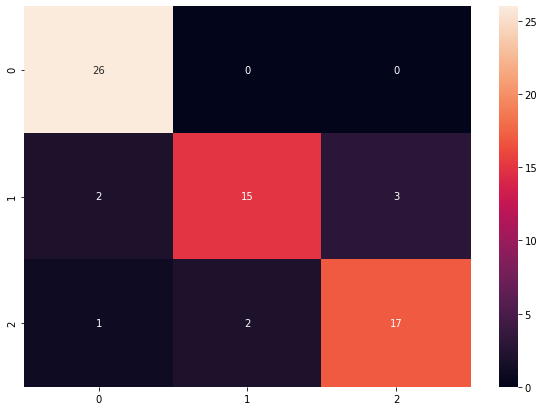

In [18]:
y_pred = model.predict(x_test)
result = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

conf_mat = confusion_matrix(y_true, result)

df_cm = pd.DataFrame(conf_mat, index = [i for i in range(0, 3)],
                  columns = [i for i in range(0, 3)])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g');

### Visualize Some Results
0= Viral Pneumonia
1= Covid19
2= Normal

[0.2678886  0.21279383 0.51931757]


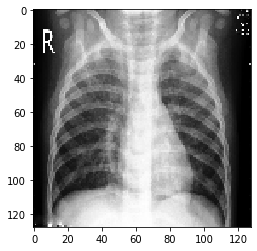

In [33]:
plt.imshow(x_train[2])
print(y_pred[2])
print(y_true[2])

[0.47029904 0.15432608 0.37537494]
2


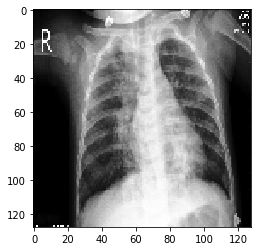

In [35]:
plt.imshow(x_train[3])
print(y_pred[3])
print(y_true[3])

[9.979685e-01 1.310626e-03 7.208042e-04]
0


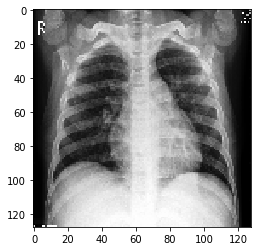

In [36]:
plt.imshow(x_train[33])
print(y_pred[33])
print(y_true[33])

[0.99598527 0.00258515 0.00142965]
0


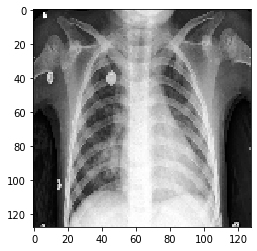

In [37]:
plt.imshow(x_train[36])
print(y_pred[36])
print(y_true[36])

[0.25176895 0.53474706 0.21348393]
1


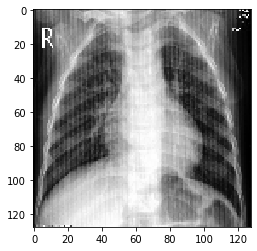

In [38]:
plt.imshow(x_train[59])
print(y_pred[59])
print(y_true[59])

# Conclusion

We have created a CNN model to classify xray images of various illnesses with 87% accuracy and 39% loss. We can further see the model is working with some sample predictions above. 